# Name: Anisha Srivastava

# The Sparks Foundation

# Task 1: Prediction using Supervised ML

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.It is done using simple linear regression analysis.

**Importing required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the data from the given link**

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [4]:
#Prints the first 5 lines of the dataset 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Prints the last 5 lines of the dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#Providing concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Providing statistical summary of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Number of rows and columns in the dataset
data.shape

(25, 2)

In [9]:
#Checking whether there are null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Data Visualization**

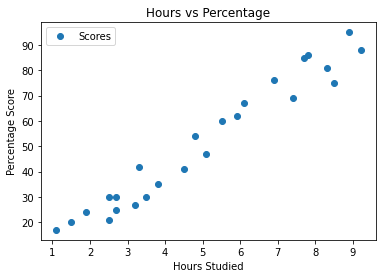

In [10]:
#Plotting the distribution of scores using 2-D graph
data.plot(x = 'Hours', y = 'Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph we can say that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
#Splittig the data into training and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Training the algorithm**

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


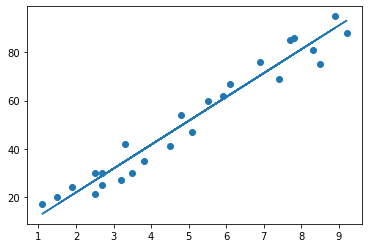

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Making predictions**

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


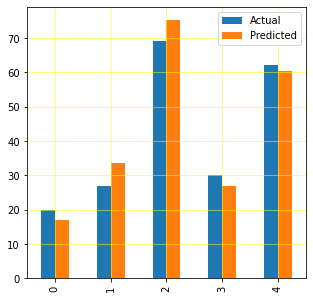

In [17]:
#Plotting bar graph to see the difference between actual and predicted value
df.plot(kind = 'bar',figsize = (5,5))
plt.grid(which = 'major', linewidth = '0.5', color = 'yellow')
plt.grid(which = 'minor', linewidth = '0.5', color = 'blue')
plt.show()

In [18]:
#What will be the predicted score if a student studies for 9.25 hrs/day?
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Evaluating the model**

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [20]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2*100

94.54906892105356

R-squared is a goodness-of-fit measure for linear regression models. Therefore, our model seems a very good fit to the data as 94% of the variability in percentage scored is explained by the hours of study.